In [15]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("train.csv/train.csv")

In [10]:
len(df)

711601

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711601 entries, 0 to 711600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   slice_path        711601 non-null  object
 1   StudyInstanceUID  711601 non-null  object
 2   patient_overall   711601 non-null  int64 
 3   C1                711601 non-null  int64 
 4   C2                711601 non-null  int64 
 5   C3                711601 non-null  int64 
 6   C4                711601 non-null  int64 
 7   C5                711601 non-null  int64 
 8   C6                711601 non-null  int64 
 9   C7                711601 non-null  int64 
 10  slice_id          711601 non-null  int64 
 11  width             711601 non-null  int64 
 12  height            711601 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 70.6+ MB


In [22]:
aa=df["patient_overall"].value_counts()

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:>

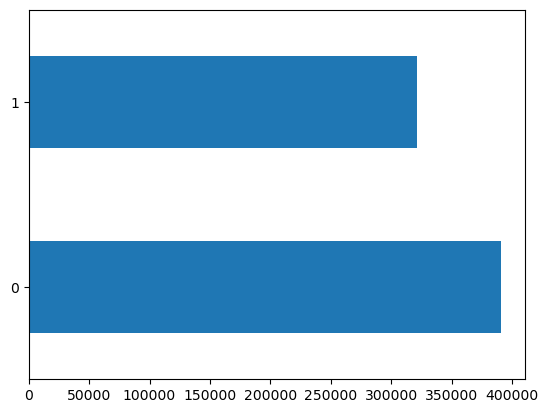

In [27]:
df["patient_overall"].value_counts().plot(kind="barh")

In [33]:
import pandas as pd
from pandas_profiling import ProfileReport

C:\Users\Pavithran\AppData\Local\Temp\ipykernel_8892\3034448462.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [34]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 26.5 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 28.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 26.8 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 27.3 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 17.2 MB/s eta 0:00:00
     ---------------------------------------- 177.8/177.8 kB ? eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 24.1 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 8.8 MB/s

In [39]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [40]:
train=ImageDataGenerator(rescale=1./255,
                            rotation_range=5,
                            zoom_range=.2,
                            horizontal_flip=True,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)

In [42]:
train_data=train.flow_from_directory('D:\\Downloads\\new_rsna\\train',color_mode='rgb',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=True,subset="training")
test_data=test.flow_from_directory('D:\\Downloads\\new_rsna\\test',color_mode='rgb',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=True)
val_data=train.flow_from_directory('D:\\Downloads\\new_rsna\\train',color_mode='rgb',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=True,subset="validation")

Found 1706 images belonging to 2 classes.
Found 918 images belonging to 2 classes.
Found 425 images belonging to 2 classes.


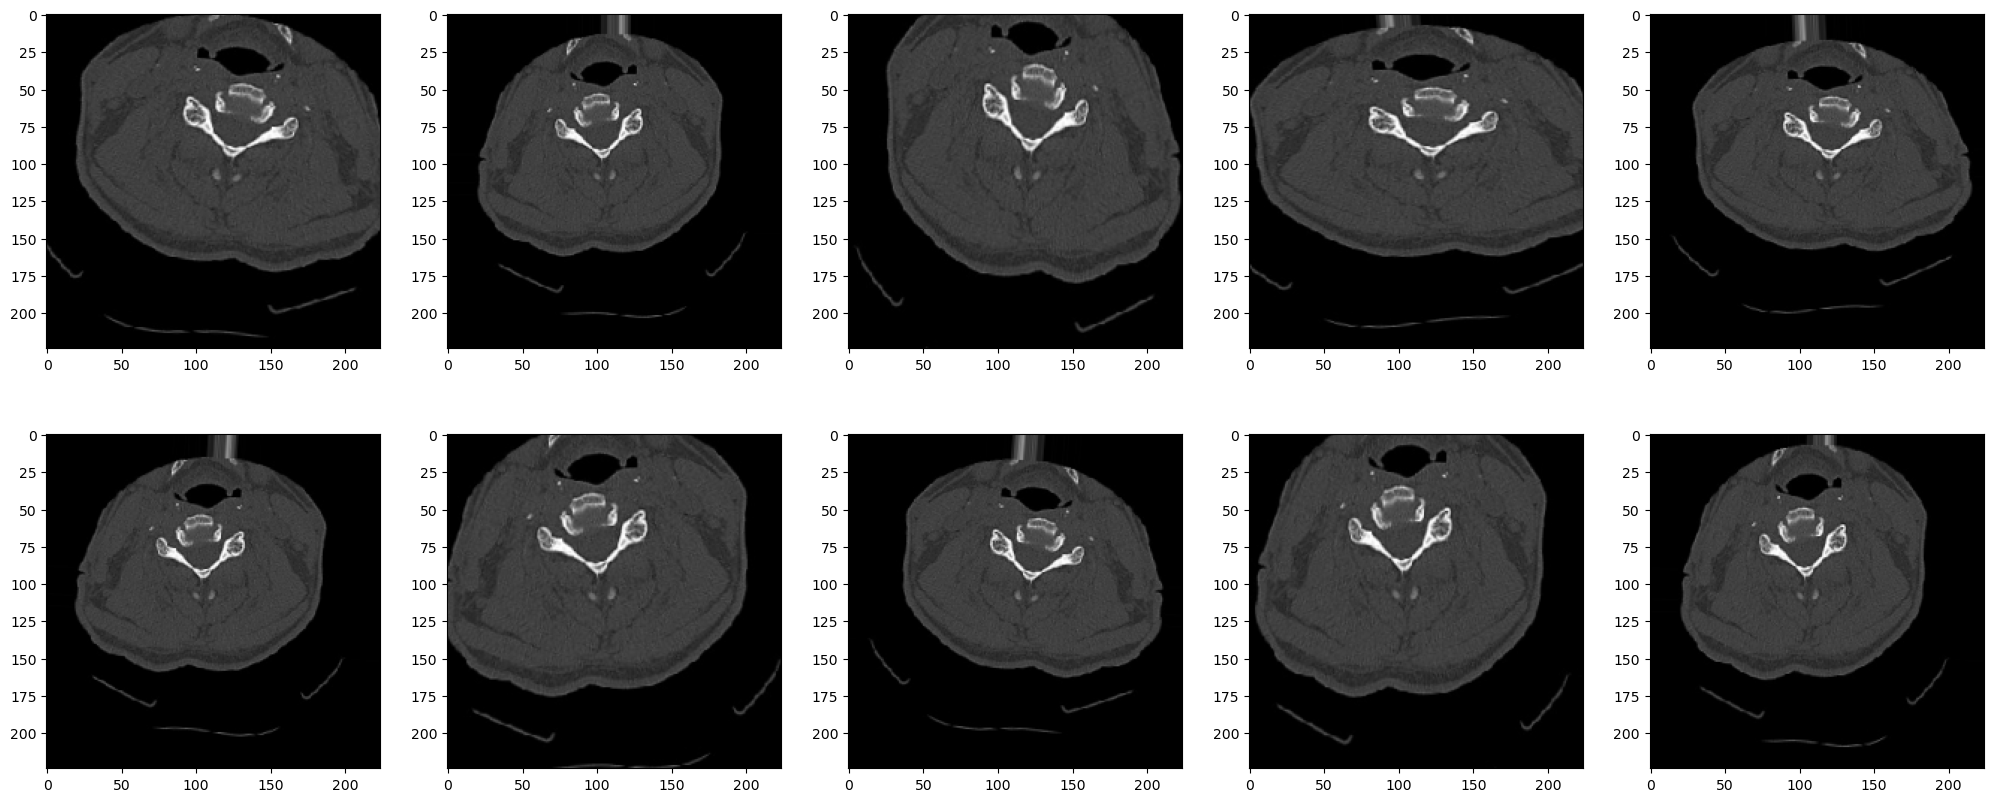

In [43]:
rows = 2
columns = 5
fig = plt.figure(figsize=(25, 10))
for k in range(0,10):
  fig.add_subplot(rows, columns, k+1)
  plt.imshow(train_data[0][0][0])

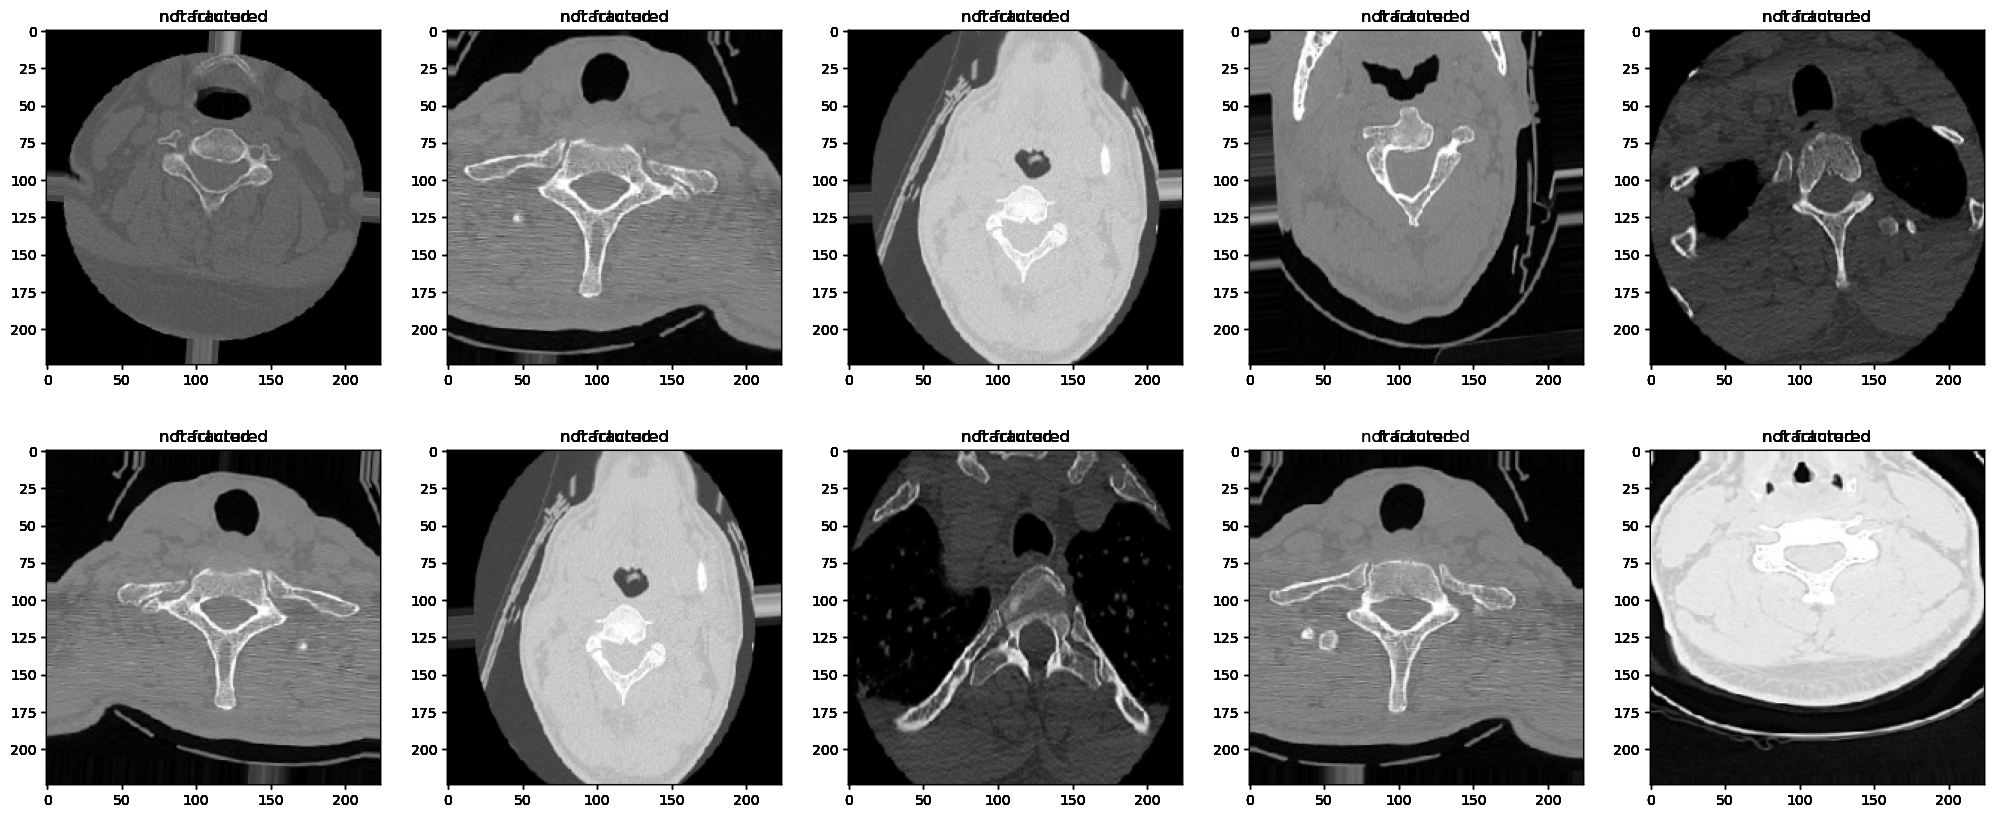

In [45]:

import random
fig = plt.figure(figsize=(25, 10))
#randomlist = random.sample(range(10, 30), 10)
rows = 2
columns = 5
for j in range(0,10):
  for i in random.sample(range(0, 54), 10):
    fig.add_subplot(rows, columns, j+1)
    aa=train_data[i][1][0]
    if aa == 0.0:
      plt.title("not fractured")
    else:
      plt.title("fractured")
    plt.imshow(train_data[i][0][0])
  #print(i)

In [46]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
#model = VGG16(weights='imagenet')

58889256/58889256 [==============================] - 5s 0us/step


In [47]:
for layer in model.layers:
    layer.trainable = False

In [48]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten



x = Flatten()(model.output)
x=Dense(256,activation='relu')(x)
prediction=Dense(1, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=prediction)

In [49]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [51]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
# fit the model
history = model.fit(
 train_data,
  
  validation_data=val_data,
  epochs=20,steps_per_epoch=len(train_data),
  callbacks=[early_stop,checkpoint],
  batch_size=32,shuffle=True)

Epoch 1/20
18/54 [=========>....................] - ETA: 2:02 - loss: 1.7373 - accuracy: 0.6146